# Практика 4

### 1.1

In [681]:
import numpy as np
import statsmodels.stats.multicomp

street = np.array([80,98,75,91,78])
garage = np.array([100,82,105,89,102])
np.corrcoef(street, garage)[0,1]
 


-0.9999999999999998

### 1.2

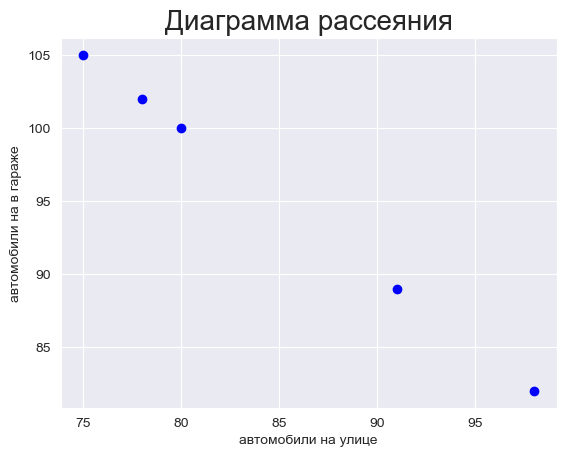

In [682]:
import matplotlib.pyplot as plt


plt.grid(True)
plt.title('Диаграмма рассеяния',fontsize=20)
plt.xlabel('автомобили на улице')
plt.ylabel('автомобили на в гараже')
plt.scatter(street,garage ,marker ='o' ,color = 'blue')


## 2

In [683]:
import pandas as pd
data = pd.read_csv("C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr2\\steam.csv")
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [684]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [685]:
data.drop_duplicates(inplace=True)

In [686]:
data.isna().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [687]:
data.english.value_counts()

1    26564
0      511
Name: english, dtype: int64

In [688]:
data.drop(['english'], axis=1, inplace=True)

In [689]:
#convert to mueric types
##release date 
data['release_date'] = [i.split('-')[0] for i in data['release_date']]
data['release_date'] = data['release_date'].apply(pd.to_numeric)
##owners
data['owners'] = [i.split('-')[1]for i in data['owners']]
data['owners'] = data['owners'].apply(pd.to_numeric)

In [690]:
data.head()

,appid,name,release_date,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,20000000,7.19
1,20,Team Fortress Classic,1999,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,10000000,3.99
2,30,Day of Defeat,2003,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,10000000,3.99
3,40,Deathmatch Classic,2001,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,10000000,3.99
4,50,Half-Life: Opposing Force,1999,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,10000000,3.99


In [691]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27075 entries, 0 to 27074
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  int64  
 3   developer         27075 non-null  object 
 4   publisher         27075 non-null  object 
 5   platforms         27075 non-null  object 
 6   required_age      27075 non-null  int64  
 7   categories        27075 non-null  object 
 8   genres            27075 non-null  object 
 9   steamspy_tags     27075 non-null  object 
 10  achievements      27075 non-null  int64  
 11  positive_ratings  27075 non-null  int64  
 12  negative_ratings  27075 non-null  int64  
 13  average_playtime  27075 non-null  int64  
 14  median_playtime   27075 non-null  int64  
 15  owners            27075 non-null  int64  
 16  price             27075 non-null  float6

### 2.1

In [692]:
cor_m = data.corr(numeric_only=True).price.to_frame()
cor_m.style.background_gradient(cmap='coolwarm')
display(cor_m)

,price
appid,-0.152112
release_date,-0.057292
required_age,0.120358
achievements,-0.007996
positive_ratings,0.036110
negative_ratings,0.051259
average_playtime,0.049242
median_playtime,0.036610
owners,0.031386
price,1.000000


**Самая большая кор. со столбцом required_age**

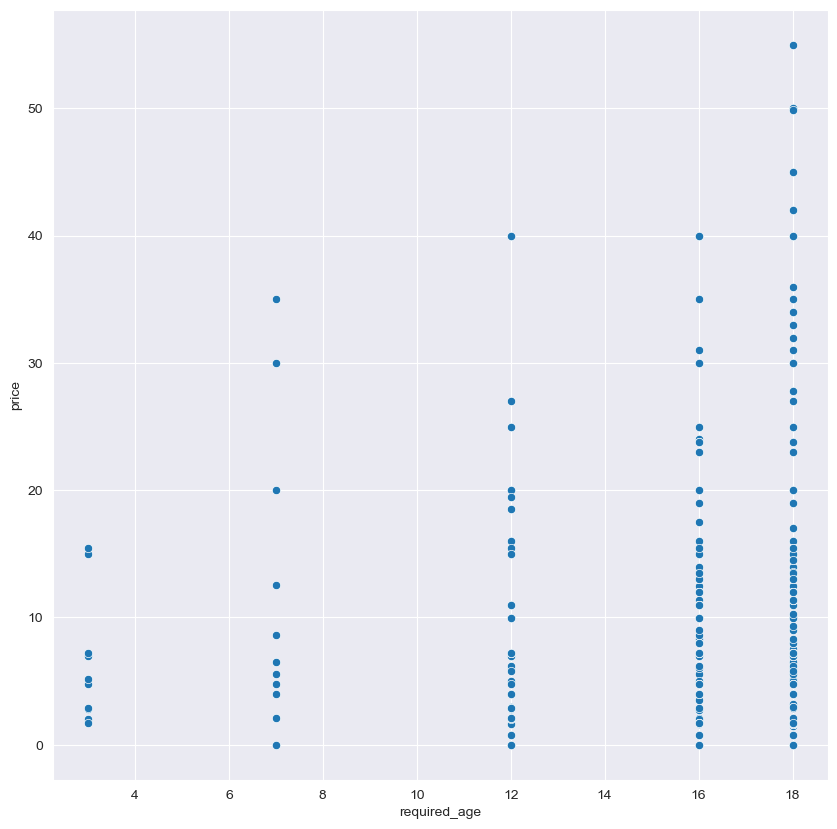

In [693]:

import pandas as pd
import plotly.graph_objs as go
import seaborn as sns

data = data.loc[data['price'] <= 100]
data = data.loc[data['required_age'] > 0]
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x="required_age",y="price" , data =data)
plt.show()


In [694]:

class LinReg:
    # a = 1
    # b = 0
    def __init__(self):
        self.a = 1 #slide
        self.b = 0 #offset
        
    def fit(self, X, y, learn_rate = 0.1,n=1000):
        for i in range(n):
            grad_a, grad_b = self.__gr_mserror(X,y)
            self.a -= learn_rate * grad_a
            self.b -= learn_rate * grad_b
    
    def predict(self, X):
        return self.a * X + self.b
    
    def mserror(self, X, y):
        y_pred = self.a * X + self.b
        return  np.sum((y- y_pred)**2)/len(X)
        
    def __gr_mserror(self, X, y):
        y_pred = self.a * X + self.b
        return np.array([(-1)*(2/len(X) * np.sum(X * (y - y_pred))),(-1)* (2 / len(X) * np.sum(y - y_pred))])
        

In [695]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Own Reg Model
my_mod = LinReg()
X = StandardScaler().fit_transform(data.price.values.reshape(-1,1))
y = StandardScaler().fit_transform(data.required_age.values.reshape(-1,1))
data.price.values.reshape(-1,1)
my_mod.fit(X,y)

print(f'My model Tilt: {my_mod.a} offset:{my_mod.b}, MSE:{my_mod.mserror(X,y)} ')

#sk learn Reg Model
mod = LinearRegression()
mod.fit(X,y)
print(f'Sk model Tilt: {mod.coef_[0]} offset:{mod.intercept_}, MSE:{mean_squared_error(mod.coef_[0]*X+mod.intercept_,y)}')


My model Tilt: 0.15839735082976866 offset:-2.5155120343184776e-16, MSE:0.9749102792501111 
Sk model Tilt: [0.15839735] offset:[-2.5691146e-16], MSE:0.9749102792501111


### 2.3 ###


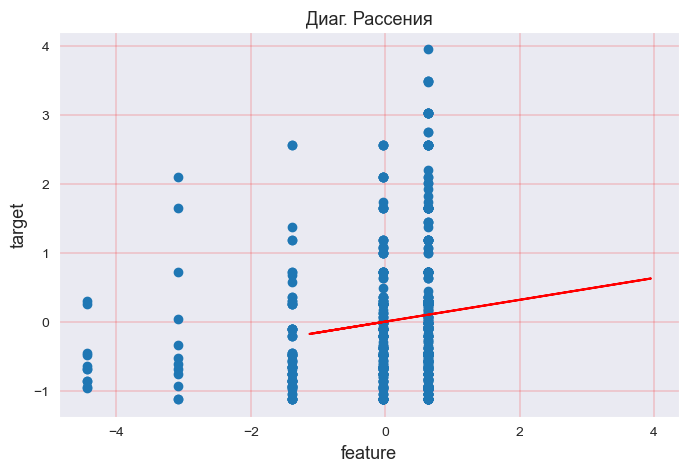

In [696]:
my_mod_y = my_mod.a * X + my_mod.b

plt.figure(figsize=(8,5))
plt.plot(X,my_mod_y,color='r')
plt.scatter(y,X)
plt.grid(color='r',linewidth=0.2)
plt.title('Диаг. Рассения',fontsize = 13)
plt.xlabel('feature',fontsize =13)
plt.ylabel('target',fontsize =13)
plt.show()

### 3.1 ###

In [697]:

data_ins = pd.read_csv('C:\\Users\\grman\\Documents\\BigPapa\\Greg\\BigData\\DataSet\\pr3\\insurance.csv')

In [698]:
data_ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [699]:
data_ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [700]:
data_ins.duplicated().sum()

1

In [701]:
data_ins.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [702]:
data_ins.duplicated().sum()

1

In [703]:
data_ins.drop_duplicates(inplace=True)

In [704]:
data_ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [705]:
data_ins.smoker.replace('yes',1,inplace=True)
data_ins.smoker.replace('no',0,inplace=True)
data_ins.smoker = data_ins.smoker.astype(int)

In [706]:
data_ins.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [707]:
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
from statsmodels.base.model import Model

southwest = data_ins[data_ins.region == 'southwest'].bmi
southeast = data_ins[data_ins.region == 'southeast'].bmi
northwest = data_ins[data_ins.region == 'northwest'].bmi
northeast = data_ins[data_ins.region == 'northeast'].bmi

stats.f_oneway(southwest, southeast, northwest, northeast)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

### 3.2 ###

In [708]:

frame_anova = pd.DataFrame({'region': data_ins.region, 'bmi': data_ins.bmi})
model_anova = ols('bmi ~ region', data = frame_anova).fit()
result = sm.stats.anova_lm(model_anova, typ=2)
result

,sum_sq,df,F,PR(>F)
region,4057.813904,3.0,39.485939,1.908729e-24
Residual,45662.381091,1333.0,NaN,NaN


### 3.3 ###

In [709]:
region_list = data_ins.region.unique()
region_pairs = []
for i in range(len(region_list) - 1):
    for j in range(i + 1, len(region_list)):
        region_pairs.append((region_list[i], region_list[j]))

for reg_1, reg_2 in region_pairs:
    print(reg_1, reg_2)
    print(sm.stats.ttest_ind(data_ins.loc[data_ins.region == reg_1].bmi,
                             data_ins.loc[data_ins.region == reg_2].bmi))
    
    
print()
print(f'Поправка Бонферрони: {0.05/6}')

southwest southeast
(-5.90837382154508, 5.437400963969294e-09, 687.0)
southwest northwest
(3.2895934605016888, 0.0010577505931067053, 647.0)
southwest northeast
(3.1169000930046153, 0.0019086161671571567, 647.0)
southeast northwest
(9.2521374892196, 2.750425554779818e-19, 686.0)
southeast northeast
(8.790905562598684, 1.1860149374249582e-17, 686.0)
northwest northeast
(0.05038637314068614, 0.9598300701853016, 646.0)

Поправка Бонферрони: 0.008333333333333333


### 3.4 ###

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.022,1.0,-1.1608,1.2048,False
northeast,southeast,4.1825,0.0,3.0326,5.3324,True
northeast,southwest,1.4231,0.0107,0.2412,2.605,True
northwest,southeast,4.1605,0.0,3.0106,5.3104,True
northwest,southwest,1.4011,0.0125,0.2192,2.583,True
southeast,southwest,-2.7594,0.0,-3.9083,-1.6104,True


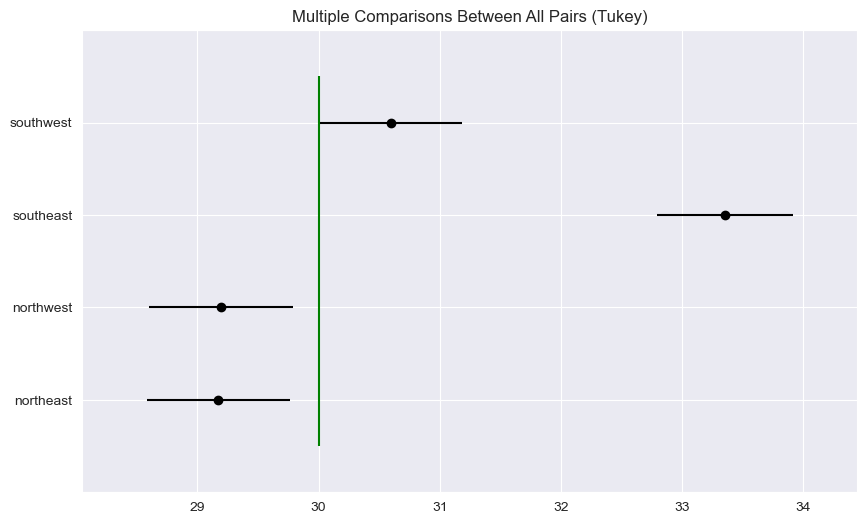

In [710]:
import matplotlib.pyplot as plt


from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=data_ins.bmi, groups=data_ins.region, alpha=0.05)
tukey.plot_simultaneous()
plt.vlines(x=30, ymin=-0.5, ymax=3.5, color='green')
tukey.summary()


In [711]:
frame_anova_2 = pd.DataFrame({'bmi': data_ins.bmi, 'region': data_ins.region, 'sex': data_ins.sex})
model_anova_2 = ols('bmi ~ C(region) + C(sex) + C(region):C(sex)', data = frame_anova_2).fit()
result = sm.stats.anova_lm(model_anova_2, typ=2)
result


,sum_sq,df,F,PR(>F)
C(region),4036.141807,3.0,39.381780,2.215903e-24
C(sex),85.359929,1.0,2.498643,1.141824e-01
C(region):C(sex),175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


group1,group2,meandiff,p-adj,lower,upper,reject
northeast.female,northeast.male,-0.2998,0.9998,-2.2713,1.6718,False
northeast.female,northwest.female,-0.0464,1.0,-2.0149,1.9222,False
northeast.female,northwest.male,-0.2133,1.0,-2.194,1.7674,False
northeast.female,southeast.female,3.3469,0.0,1.4093,5.2846,True
northeast.female,southeast.male,4.6657,0.0,2.7627,6.5686,True
northeast.female,southwest.female,0.7362,0.9498,-1.2384,2.7107,False
northeast.female,southwest.male,1.8051,0.101,-0.1664,3.7767,False
northeast.male,northwest.female,0.2534,0.9999,-1.709,2.2159,False
northeast.male,northwest.male,0.0864,1.0,-1.8882,2.0611,False
northeast.male,southeast.female,3.6467,0.0,1.7153,5.5782,True


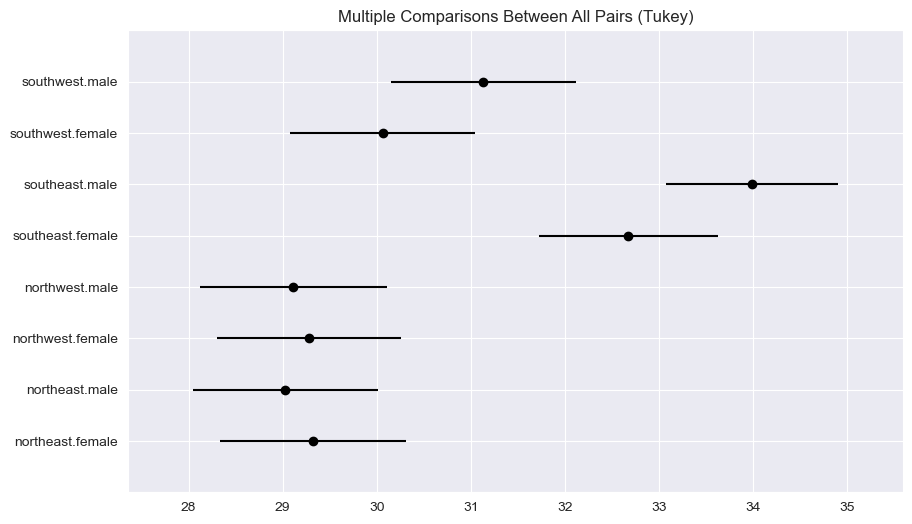

In [712]:
tukey = pairwise_tukeyhsd(endog=data_ins.bmi, groups=data_ins.region + "." + data_ins.sex, alpha=0.05)
tukey.plot_simultaneous()
tukey.summary()